<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_ELAST_Elastic_properties_of_bulk_and_low_dimensional_materials_using_van_der_Waals_density_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reference:**
[Elastic properties of bulk and low-dimensional materials using van der Waals density functional
](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.98.014107)

In [1]:
!pip install jarvis-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from jarvis.db.figshare import data
import pandas as pd

df=pd.DataFrame(data('dft_3d'))

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.


In [3]:
import numpy as np
df_elast=df[['jid','density','atoms','poisson','elastic_tensor','bulk_modulus_kv','shear_modulus_gv','optb88vdw_bandgap']].replace('na',np.nan).dropna()

In [4]:
cij = np.array([np.array(i) for i in df_elast['elastic_tensor'].values])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

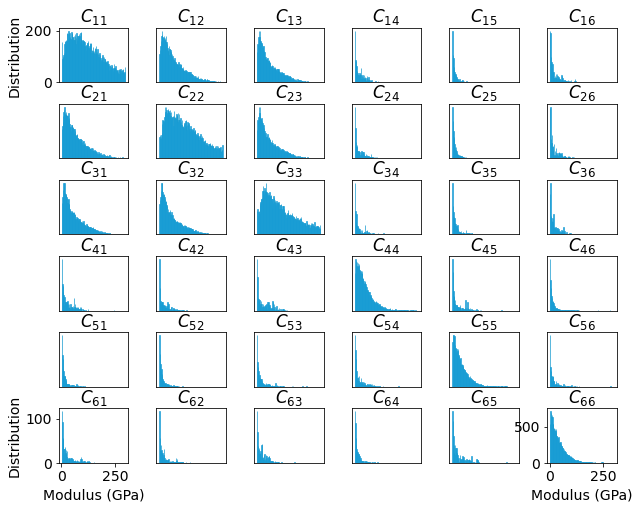

In [5]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
the_grid = GridSpec(6, 6,hspace=.4,wspace=.4)
fig=plt.figure()
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})

for i in range(6):
  for j in range(6):
    plt.subplot(the_grid[i, j])
    plt.hist(cij[:,i,j],bins=np.arange(2,300,2),facecolor = '#2ab0ff', edgecolor='#169acf',alpha=0.7)
    txt='$C_{'+str(i+1)+str(j+1)+'}$'
    plt.title(txt)
    if i==0 and j==0:
      plt.ylabel('Distribution')
      plt.xticks([])
    elif i==5 and j==0:
      plt.xlabel('Modulus (GPa)')
      plt.ylabel('Distribution')
    elif i==5 and j==5:
      plt.xlabel('Modulus (GPa)')
    else:
      plt.xticks([])
      plt.yticks([])
plt.tight_layout()

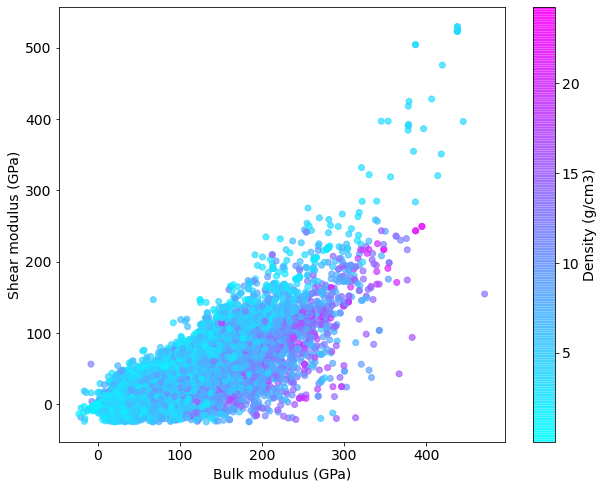

In [6]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})
plt.scatter(df_elast['bulk_modulus_kv'],df_elast['shear_modulus_gv'],c=df_elast['density'],cmap='cool',alpha=.7)
plt.xlabel('Bulk modulus (GPa)')
plt.ylabel('Shear modulus (GPa)')
cbar=plt.colorbar()
cbar.set_label('Density (g/cm3)', rotation=90)

In [7]:
df_elast['pugh_ratio']=(df_elast['shear_modulus_gv']/df_elast['bulk_modulus_kv'])

Text(2, -500, 'Brittle')

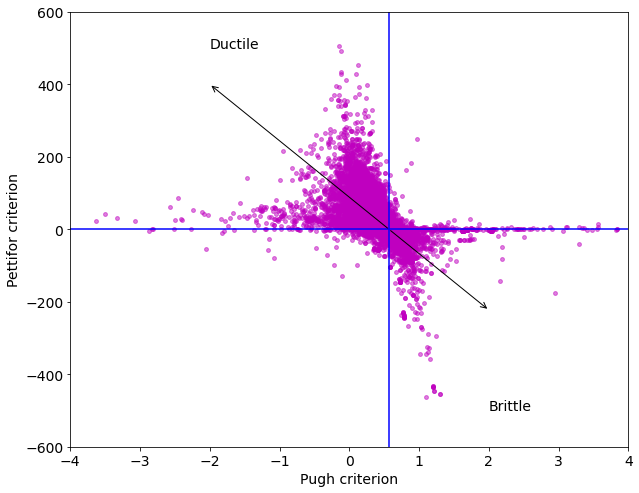

In [8]:
# from scipy.spatial import ConvexHull
# def boundary(x=[],y=[]):
#  z=[]
#  x=np.array(x)
#  y=np.array(y)
#  for i,j in zip(x,y):
#    z.append([i,j])
#  z=np.array(z)
#  hull = ConvexHull(z)
#  res=[]
#  for simplex in hull.simplices:
#        res.append([list(x[simplex]), list(y[simplex])])
#  return res

plt.figure(figsize=(10,8))
df_elast2=df_elast.replace(np.inf,np.nan).dropna()
cij = np.array([np.array(i) for i in df_elast2['elastic_tensor'].values])
pugh = df_elast2.replace(np.inf,np.nan).dropna()['pugh_ratio']
pettifor = cij[:,0,1]-cij[:,3,3]
#plt.hist(df_elast2.replace(np.inf,np.nan).dropna()['pugh_ratio'],bins=np.arange(-3,3,.1))
plt.scatter(pugh,pettifor,c='m',s=15,alpha=.5)
plt.xlim([-4,4])
plt.ylim([-600,600])
plt.axvline(x=0.571,c='b')
plt.axhline(y=0.0,c='b')
plt.xlabel('Pugh criterion')
plt.ylabel('Pettifor criterion')
plt.annotate(s='', xy=(-2,400), xytext=(.57,0), arrowprops=dict(arrowstyle='->'))
plt.text(-2,500,'Ductile')
plt.annotate(s='', xy=(2,-222.568), xytext=(.57,0), arrowprops=dict(arrowstyle='->'))
plt.text(2,-500,'Brittle')


Text(0, 0.5, 'Distribution')

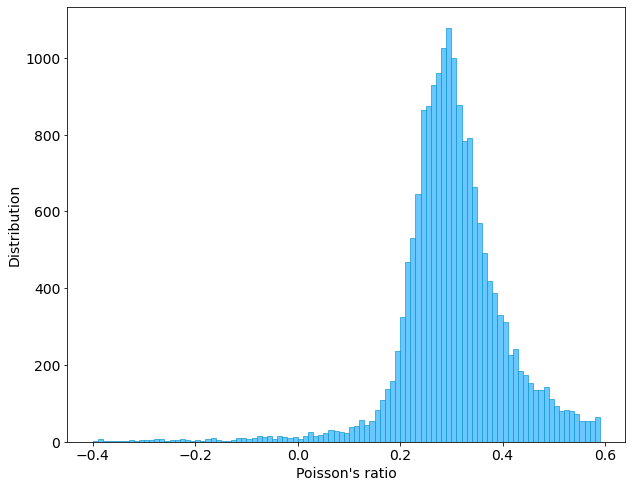

In [9]:
plt.figure(figsize=(10,8))
plt.hist(df_elast['poisson'],bins=np.arange(-0.4,0.6,0.01),facecolor = '#2ab0ff', edgecolor='#169acf',alpha=0.7)
plt.xlabel("Poisson's ratio")
plt.ylabel('Distribution')

In [10]:
dft2d=pd.DataFrame(data('dft_2d'))

Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.


In [11]:
dft2delast=dft2d[['exfoliation_energy','elastic_tensor','jid']].replace('na',np.nan).dropna()
c2ij = np.array([np.array(i) for i in dft2delast['elastic_tensor'].values])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

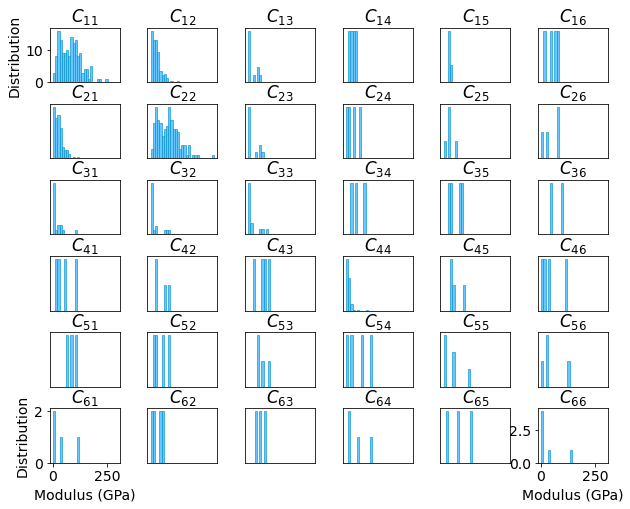

In [12]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
the_grid = GridSpec(6, 6,hspace=.4,wspace=.4)
fig=plt.figure()
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})

for i in range(6):
  for j in range(6):
    plt.subplot(the_grid[i, j])
    plt.hist(c2ij[:,i,j],bins=np.arange(2,300,10),facecolor = '#2ab0ff', edgecolor='#169acf',alpha=0.7)
    txt='$C_{'+str(i+1)+str(j+1)+'}$'
    plt.title(txt)
    if i==0 and j==0:
      plt.ylabel('Distribution')
      plt.xticks([])
    elif i==5 and j==0:
      plt.xlabel('Modulus (GPa)')
      plt.ylabel('Distribution')
    elif i==5 and j==5:
      plt.xlabel('Modulus (GPa)')
    else:
      plt.xticks([])
      plt.yticks([])
plt.tight_layout()

Text(0, 0.5, 'Exfoliation energy (meV/atom)')

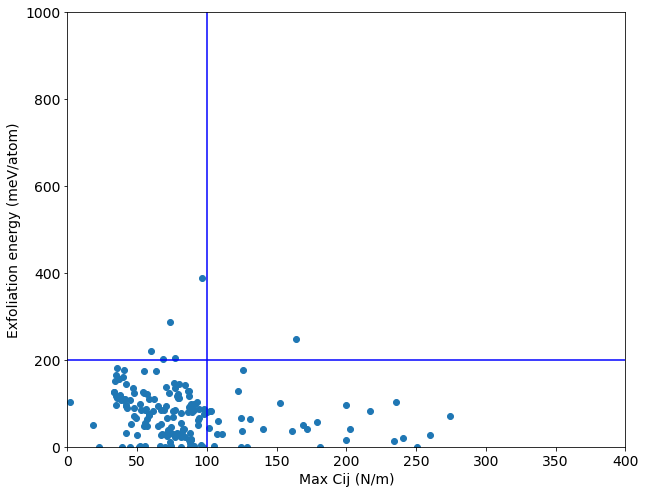

In [13]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 14})
x=[]
for ii in dft2delast['elastic_tensor'].values:
  x.append(max(np.array(ii).flatten()))
plt.scatter(dft2delast['exfoliation_energy'],x)
plt.xlim([0,400])
plt.ylim([0,1000])
plt.axvline(x=100,c='b')
plt.axhline(y=200,c='b')
plt.xlabel('Max Cij (N/m)')
plt.ylabel('Exfoliation energy (meV/atom)')